<a href="https://colab.research.google.com/github/EmilianoCruz/DeepLearning/blob/main/cursoIntroduccionApredizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1
Emiliano Cruz Ruiz

In [1]:
from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_data[5])
print(train_labels[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
0


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()
reseverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reseverse_word_index.get(i-3,'?') for i in train_data[17]])
print(decoded_review)

1641221/1641221 [==============================] - 0s 0us/step
? at the height of the ? big ? racism row in 2007 involving ? ? and the late ? ? i condemned on an internet forum those ? b b ' fans who praised the show after years of bashing ? ? sitcoms such as ? ? ? ? ? i thought they were being ? and said so ? ain't half hot ? was then thrown into the argument with some pointing out it had starred an english actor ? up well yes but michael bates had lived in india as a boy and spoke ? ? the show's ? overlook the reality he brought to his performance as ? ? ? the noted indian character actor ? ? said in a 1995 documentary ? ? the ? that he was upset when he heard bates had landed the role but added no indian actor could have played that role as well as bates indeed br br ? was perry and ? companion show to ? ? also set in wartime the ? english town of ? on sea had been replaced by the hot steamy ? of india in particularly a place called ? where an army concert party puts on shows for th

In [5]:
#ONE HOT ENCODING
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
#Print an example of one hot encoded sample
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
#Vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers
model = models.Sequential() #Forma de construir la red, de forma secuencial
model.add(layers. Dense (16, activation='relu', input_shape=(10000,))) #16 es el numero de neuronas
model.add(layers.Dense (16, activation='relu')) #Se añade una segunda capa densa con 16 neuronas
model.add(layers.Dense(1, activation='sigmoid')) #Capa 3 con 1 neurona y una sola salida, con la activacion simgoid


In [9]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train [10000:]


In [11]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 130ms/step - loss: 0.5239 - accuracy: 0.7790 - val_loss: 0.4065 - val_accuracy: 0.8517
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3269 - accuracy: 0.8962 - val_loss: 0.3147 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 46ms/step - loss: 0.2450 - accuracy: 0.9221 - val_loss: 0.3227 - val_accuracy: 0.8684
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1981 - accuracy: 0.9344 - val_loss: 0.2753 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1640 - accuracy: 0.9473 - val_loss: 0.2943 - val_accuracy: 0.8836
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1389 - accuracy: 0.9583 - val_loss: 0.2808 - val_accuracy: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1194 - accuracy: 0.9641 - val_loss: 0.3140 - val_accuracy: 0.8809
Epoch 8/20
3

In [12]:
#Consulting the history
history_dict = history.history
print( history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


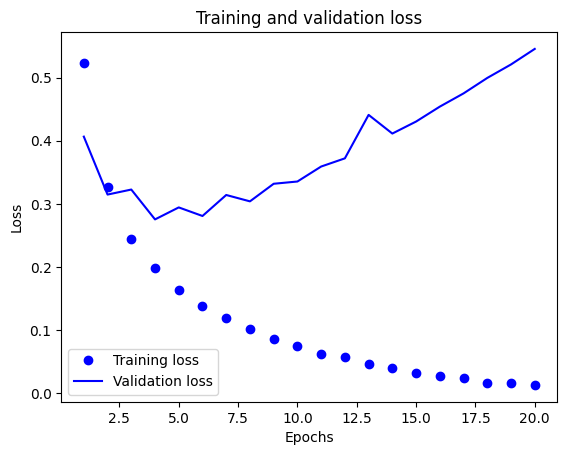

In [13]:
#Plotting the loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 20 + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

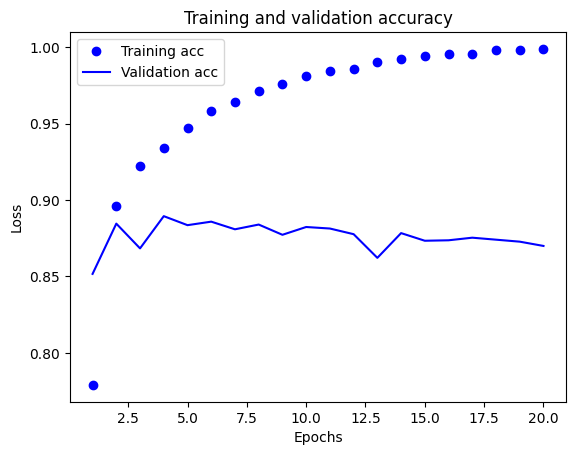

In [14]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense (16, activation='relu', input_shape=(10000,)))
model.add(layers. Dense (16, activation='relu'))
model.add(layers. Dense (1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4914 - accuracy: 0.8107
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2950 - accuracy: 0.8971
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2283 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2853 - accuracy: 0.8867


In [16]:
print(results)

[0.2853335738182068, 0.886680006980896]


In [17]:
model.predict(x_test)

782/782 [==============================] - 4s 5ms/step


array([[0.22873391],
       [0.9999409 ],
       [0.89721715],
       ...,
       [0.13186057],
       [0.09644233],
       [0.61537874]], dtype=float32)

#Parte 2

In [18]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [19]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [20]:
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


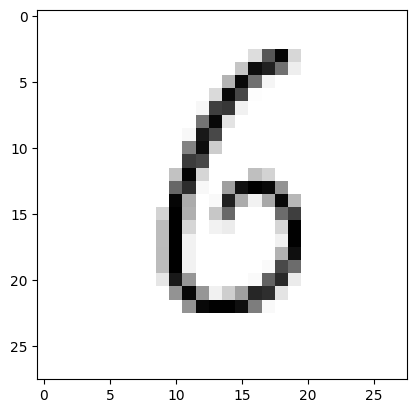

In [21]:
digit = train_images[18]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [22]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28*28))
test_images= test_images.astype('float32')/255

In [23]:
from keras. utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
print(train_labels[18])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [25]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512,activation = 'relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation = 'softmax'))

In [26]:
network.compile(optimizer='rmsprop',
loss = 'categorical_crossentropy',
metrics =['accuracy'])

In [27]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2609 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 0.1065 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0499 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0372 - accuracy: 0.9888


In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0782 - accuracy: 0.9771
test_acc: 0.9771000146865845


#Parte 3

In [29]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [30]:
print(train_data.shape)
print(test_data.shape)
print(train_data[0])
print(train_targets[0])

(404, 13)
(102, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [31]:
#Normalizing the data
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [32]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(64, activation ='relu', input_shape=(train_data.shape[1],)))
network.add(layers.Dense(64, activation ='relu'))
network.add(layers.Dense(1))

In [33]:
network.compile(optimizer = 'rmsprop', loss='mse', metrics = ['mae'])

In [34]:
network.fit (train_data, train_targets, epochs=20,batch_size =1)

Epoch 1/20
404/404 [==============================] - 1s 2ms/step - loss: 174.2906 - mae: 9.5912
Epoch 2/20
404/404 [==============================] - 1s 2ms/step - loss: 23.8531 - mae: 3.1813
Epoch 3/20
404/404 [==============================] - 1s 2ms/step - loss: 18.2892 - mae: 2.8274
Epoch 4/20
404/404 [==============================] - 1s 2ms/step - loss: 15.4732 - mae: 2.5968
Epoch 5/20
404/404 [==============================] - 1s 2ms/step - loss: 13.8581 - mae: 2.4571
Epoch 6/20
404/404 [==============================] - 1s 2ms/step - loss: 12.7636 - mae: 2.3655
Epoch 7/20
404/404 [==============================] - 1s 3ms/step - loss: 11.9503 - mae: 2.3036
Epoch 8/20
404/404 [==============================] - 1s 3ms/step - loss: 11.6116 - mae: 2.2425
Epoch 9/20
404/404 [==============================] - 1s 3ms/step - loss: 11.0695 - mae: 2.2289
Epoch 10/20
404/404 [==============================] - 1s 2ms/step - loss: 10.4905 - mae: 2.1846
Epoch 11/20
404/404 [=================

In [35]:
test_loss, test_acc = network.evaluate(test_data,test_targets)
print(test_loss)
print(test_acc)

4/4 [==============================] - 0s 5ms/step - loss: 22.6233 - mae: 2.9852
22.62329864501953
2.985156774520874
